In [1]:
#자동미분과 선형회귀실습
import tensorflow as tf
#tape_gradient()는 자동미분을 수행한다. 
w=tf.Variable(2.)

def f(w):
    y=w**2
    z=2*y+5
    return z

with tf.GradientTape() as tape:
    z=f(w)
gradients=tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [2]:
#선형회귀를 구현해보자
#학습될 가중치 선언
W=tf.Variable(4.0)
b=tf.Variable(1.0)
@tf.function
def hypothesis(x):
    return W*x+b
x_test=[3.5,5,5.5,6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [4]:
#평균제곱오차를 손실함수로 정의
def mse_loss(y_pred,y):
    #두개의 차이값을 제곱을 해서 평균을 취한다.
    return tf.reduce_mean(tf.square(y_pred-y))
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적
optimizer=tf.optimizers.SGD(0.01) #경사하강법
#약 300번에 걸쳐서 경사하강법을 수행하겠다.
for i in range(301):
    with tf.GradientTape() as tape:
        #현재 파라미터에 기반한 입력x에 대한 예측값을 y_pred
        y_pred=hypothesis(X)
        #평균제곱오차를 계산
        cost=mse_loss(y_pred,y)
    
    #손실 함수에 대한 파라미터의 미분값 계산
    gradients=tape.gradient(cost,[W,b])
    #파라미터 업데이트
    optimizer.apply_gradients(zip(gradients,[W,b]))
    
    if i%10==0:
        print("epoch : {:3}| W의 값 : {:5.4f} | b의 값 : {:5.4f} | cost : {:5.6f}".format(i,W.numpy(),b.numpy(),cost))
       
    

epoch :   0| W의 값 : 8.2133 | b의 값 : 1.6644 | cost : 1402.555542
epoch :  10| W의 값 : 10.4971 | b의 값 : 1.9769 | cost : 1.351182
epoch :  20| W의 값 : 10.5047 | b의 값 : 1.9297 | cost : 1.328165
epoch :  30| W의 값 : 10.5119 | b의 값 : 1.8844 | cost : 1.306967
epoch :  40| W의 값 : 10.5188 | b의 값 : 1.8409 | cost : 1.287436
epoch :  50| W의 값 : 10.5254 | b의 값 : 1.7991 | cost : 1.269459
epoch :  60| W의 값 : 10.5318 | b의 값 : 1.7591 | cost : 1.252898
epoch :  70| W의 값 : 10.5379 | b의 값 : 1.7206 | cost : 1.237644
epoch :  80| W의 값 : 10.5438 | b의 값 : 1.6837 | cost : 1.223598
epoch :  90| W의 값 : 10.5494 | b의 값 : 1.6483 | cost : 1.210658
epoch : 100| W의 값 : 10.5548 | b의 값 : 1.6143 | cost : 1.198740
epoch : 110| W의 값 : 10.5600 | b의 값 : 1.5817 | cost : 1.187767
epoch : 120| W의 값 : 10.5650 | b의 값 : 1.5504 | cost : 1.177665
epoch : 130| W의 값 : 10.5697 | b의 값 : 1.5204 | cost : 1.168354
epoch : 140| W의 값 : 10.5743 | b의 값 : 1.4916 | cost : 1.159782
epoch : 150| W의 값 : 10.5787 | b의 값 : 1.4639 | cost : 1.151890
epoch 

In [5]:
x_test=[3.5,5,5.5,6]
print(hypothesis(x_test).numpy())
#예측값

[38.35479  54.295143 59.608593 64.92204 ]


In [6]:
#케라스로 구현하는 선형회귀
#model=keras.models.Sequential()
#model.add(keras.layers.Dense(1,input_dim=1))
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적
model=Sequential()

#입력 x 차원은 1, 출력 y 차원도 1 선형회귀이므로 activation은 linear
model.add(Dense(1,input_dim=1,activation='linear'))
#sgd는 경사하강법, 학습률은 0.01
sgd=optimizers.SGD(lr=0.01)
#손실함수는 평균제곱오차를 사용
model.compile(optimizer=sgd,loss='mse',metrics=['mse'])
#주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도
model.fit(X,y,batch_size=1,epochs=300,shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 623us/step - loss: 395.7432 - mse: 395.7432
Epoch 2/300
9/9 [==============================] - 0s 620us/step - loss: 1.8644 - mse: 1.8644
Epoch 3/300
9/9 [==============================] - 0s 624us/step - loss: 1.8586 - mse: 1.8586
Epoch 4/300
9/9 [==============================] - 0s 623us/step - loss: 1.8531 - mse: 1.8531
Epoch 5/300
9/9 [==============================] - 0s 624us/step - loss: 1.8477 - mse: 1.8477
Epoch 6/300
9/9 [==============================] - 0s 623us/step - loss: 1.8425 - mse: 1.8425
Epoch 7/300
9/9 [==============================] - 0s 624us/step - loss: 1.8376 - mse: 1.8376
Epoch 8/300
9/9 [==============================] - 0s 499us/step - loss: 1.8328 - mse: 1.8328
Epoch 9/300
9/9 [==============================] - 0s 499us/step - loss: 1.8281 - mse: 1.8281
Epoch 10/300
9/9 [==============================] - 0s 624us/step - loss: 1.8237 - mse: 1.8237
Epoch 11/300
9/9 [==============================] - 0s 

9/9 [==============================] - 0s 499us/step - loss: 1.6993 - mse: 1.6993
Epoch 173/300
9/9 [==============================] - 0s 748us/step - loss: 1.6993 - mse: 1.6993
Epoch 174/300
9/9 [==============================] - 0s 541us/step - loss: 1.6992 - mse: 1.6992
Epoch 175/300
9/9 [==============================] - 0s 502us/step - loss: 1.6992 - mse: 1.6992
Epoch 176/300
9/9 [==============================] - 0s 500us/step - loss: 1.6992 - mse: 1.6992
Epoch 177/300
9/9 [==============================] - 0s 499us/step - loss: 1.6992 - mse: 1.6992
Epoch 178/300
9/9 [==============================] - 0s 494us/step - loss: 1.6992 - mse: 1.6992
Epoch 179/300
9/9 [==============================] - 0s 499us/step - loss: 1.6992 - mse: 1.6992
Epoch 180/300
9/9 [==============================] - 0s 623us/step - loss: 1.6991 - mse: 1.6991
Epoch 181/300
9/9 [==============================] - 0s 499us/step - loss: 1.6991 - mse: 1.6991
Epoch 182/300
9/9 [==============================] - 0

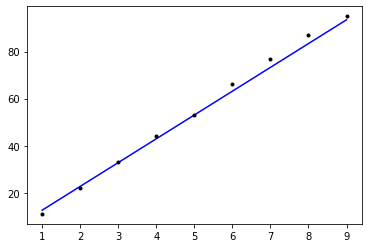

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,model.predict(X),'b',X,y,'k.')

In [8]:
print(model.predict([9.5]))

[[98.556465]]


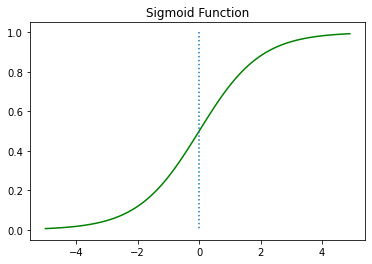

In [12]:
#로지스틱 회귀 : 시험점수가 합 불인지 스팸인지 아닌지 분류하는 문제: 이진분류
#시그모이드 함수 만들기
%matplotlib inline
import numpy as np #넘파이 사용
import matplotlib.pyplot as plt #맷플롯립 사용

def sigmoid(x):
    return 1/(1+np.exp(-x))
#위 함수는 W=1, b=0이다.
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0],':')#가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

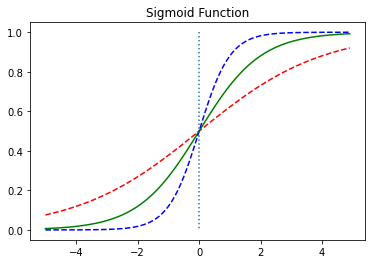

In [13]:
y1=sigmoid(0.5*x)
y2=sigmoid(x)
y3=sigmoid(2*x)

plt.plot(x,y1,'r',linestyle='--')#W값이 0.5일때
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle='--')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()
#W가 커지면 경사가 커지고 작아지면 경사가 작아진다.

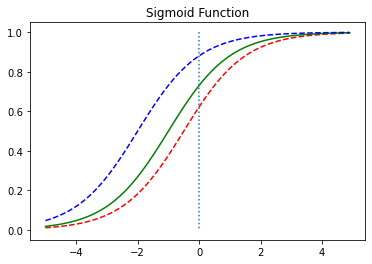

In [14]:
y1=sigmoid(x+0.5)
y2=sigmoid(x+1)
y3=sigmoid(x+2)
plt.plot(x,y1,'r',linestyle='--')#W값이 0.5일때
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle='--')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

In [15]:
#텐서플로우를 통한 로지스틱 회귀 실습
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X=np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model=Sequential()
model.add(Dense(1,input_dim=1,activation='sigmoid'))
#옵티마이저는 sgd
#손실함수는 binary_crossentropy
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['binary_accuracy'])
#200번하자, 손실함수는 cross_entropy
model.fit(X,y,batch_size=1,epochs=200,shuffle=False)

Epoch 1/200
13/13 [==============================] - 0s 748us/step - loss: 0.1773 - binary_accuracy: 0.9526
Epoch 2/200
13/13 [==============================] - 0s 831us/step - loss: 0.1683 - binary_accuracy: 0.9526
Epoch 3/200
13/13 [==============================] - 0s 749us/step - loss: 0.1601 - binary_accuracy: 0.9526
Epoch 4/200
13/13 [==============================] - 0s 748us/step - loss: 0.1529 - binary_accuracy: 0.9526
Epoch 5/200
13/13 [==============================] - 0s 666us/step - loss: 0.1469 - binary_accuracy: 0.9526
Epoch 6/200
13/13 [==============================] - 0s 499us/step - loss: 0.1419 - binary_accuracy: 0.9526
Epoch 7/200
13/13 [==============================] - 0s 499us/step - loss: 0.1381 - binary_accuracy: 0.9526
Epoch 8/200
13/13 [==============================] - 0s 582us/step - loss: 0.1353 - binary_accuracy: 0.9526
Epoch 9/200
13/13 [==============================] - 0s 582us/step - loss: 0.1332 - binary_accuracy: 0.9526
Epoch 10/200
13/13 [========

13/13 [==============================] - 0s 499us/step - loss: 0.0634 - binary_accuracy: 0.9526
Epoch 151/200
13/13 [==============================] - 0s 497us/step - loss: 0.0632 - binary_accuracy: 0.9526
Epoch 152/200
13/13 [==============================] - 0s 499us/step - loss: 0.0630 - binary_accuracy: 0.9526
Epoch 153/200
13/13 [==============================] - 0s 450us/step - loss: 0.0628 - binary_accuracy: 0.9526
Epoch 154/200
13/13 [==============================] - 0s 501us/step - loss: 0.0626 - binary_accuracy: 0.9526
Epoch 155/200
13/13 [==============================] - 0s 499us/step - loss: 0.0624 - binary_accuracy: 0.9526
Epoch 156/200
13/13 [==============================] - 0s 499us/step - loss: 0.0622 - binary_accuracy: 0.9526
Epoch 157/200
13/13 [==============================] - 0s 499us/step - loss: 0.0620 - binary_accuracy: 0.9526
Epoch 158/200
13/13 [==============================] - 0s 499us/step - loss: 0.0618 - binary_accuracy: 0.9526
Epoch 159/200
13/13 [===

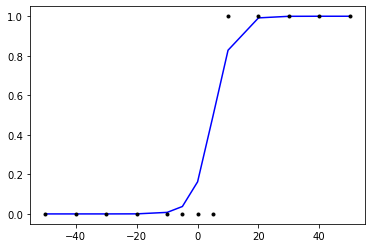

In [16]:
plt.plot(X,model.predict(X),'b',X,y,'k.')

In [17]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.21101812]
 [0.269408  ]
 [0.33705252]
 [0.41210118]
 [0.45147806]]
[[0.8690871 ]
 [0.99396795]
 [0.9997556 ]
 [0.9999901 ]
 [1.        ]]


In [18]:
#다중 입력에 대한 (다중의 독립변수 x에 대한)
X=np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점
y=np.array([73,82,72,57,34])#최종 성적

model=Sequential()
model.add(Dense(1,input_dim=3,activation='linear'))
sgd=optimizers.SGD(lr=0.00001)
#학습률은 0.00001
model.compile(optimizer=sgd,loss='mse',metrics=['mse'])
model.fit(X,y,batch_size=1,epochs=2000,shuffle=False)

Epoch 1/2000
5/5 [==============================] - 0s 1000us/step - loss: 14545.8405 - mse: 14545.8405
Epoch 2/2000
5/5 [==============================] - 0s 997us/step - loss: 2845.2462 - mse: 2845.2462
Epoch 3/2000
5/5 [==============================] - 0s 748us/step - loss: 814.8135 - mse: 814.8135
Epoch 4/2000
5/5 [==============================] - 0s 1ms/step - loss: 373.2977 - mse: 373.2977
Epoch 5/2000
5/5 [==============================] - 0s 998us/step - loss: 237.4097 - mse: 237.4097
Epoch 6/2000
5/5 [==============================] - 0s 995us/step - loss: 176.2450 - mse: 176.2450
Epoch 7/2000
5/5 [==============================] - 0s 999us/step - loss: 139.4733 - mse: 139.4733
Epoch 8/2000
5/5 [==============================] - 0s 997us/step - loss: 113.3594 - mse: 113.3594
Epoch 9/2000
5/5 [==============================] - 0s 997us/step - loss: 93.2427 - mse: 93.2427
Epoch 10/2000
5/5 [==============================] - 0s 748us/step - loss: 77.1664 - mse: 77.1664
Epoch 11

5/5 [==============================] - 0s 753us/step - loss: 1.6524 - mse: 1.6524
Epoch 170/2000
5/5 [==============================] - 0s 499us/step - loss: 1.6466 - mse: 1.6466
Epoch 171/2000
5/5 [==============================] - 0s 740us/step - loss: 1.6409 - mse: 1.6409
Epoch 172/2000
5/5 [==============================] - 0s 499us/step - loss: 1.6351 - mse: 1.6351
Epoch 173/2000
5/5 [==============================] - 0s 557us/step - loss: 1.6294 - mse: 1.6294
Epoch 174/2000
5/5 [==============================] - 0s 499us/step - loss: 1.6237 - mse: 1.6237
Epoch 175/2000
5/5 [==============================] - 0s 752us/step - loss: 1.6180 - mse: 1.6180
Epoch 176/2000
5/5 [==============================] - 0s 499us/step - loss: 1.6124 - mse: 1.6124
Epoch 177/2000
5/5 [==============================] - 0s 499us/step - loss: 1.6068 - mse: 1.6068
Epoch 178/2000
5/5 [==============================] - 0s 499us/step - loss: 1.6011 - mse: 1.6011
Epoch 179/2000
5/5 [=========================

5/5 [==============================] - 0s 748us/step - loss: 0.9223 - mse: 0.9223
Epoch 338/2000
5/5 [==============================] - 0s 499us/step - loss: 0.9191 - mse: 0.9191
Epoch 339/2000
5/5 [==============================] - 0s 503us/step - loss: 0.9159 - mse: 0.9159
Epoch 340/2000
5/5 [==============================] - 0s 507us/step - loss: 0.9128 - mse: 0.9128
Epoch 341/2000
5/5 [==============================] - 0s 742us/step - loss: 0.9097 - mse: 0.9097
Epoch 342/2000
5/5 [==============================] - 0s 748us/step - loss: 0.9065 - mse: 0.9065
Epoch 343/2000
5/5 [==============================] - 0s 742us/step - loss: 0.9034 - mse: 0.9034
Epoch 344/2000
5/5 [==============================] - 0s 499us/step - loss: 0.9003 - mse: 0.9003
Epoch 345/2000
5/5 [==============================] - 0s 748us/step - loss: 0.8972 - mse: 0.8972
Epoch 346/2000
5/5 [==============================] - 0s 502us/step - loss: 0.8942 - mse: 0.8942
Epoch 347/2000
5/5 [=========================

5/5 [==============================] - 0s 748us/step - loss: 0.5213 - mse: 0.5213
Epoch 506/2000
5/5 [==============================] - 0s 748us/step - loss: 0.5195 - mse: 0.5195
Epoch 507/2000
5/5 [==============================] - 0s 499us/step - loss: 0.5178 - mse: 0.5178
Epoch 508/2000
5/5 [==============================] - 0s 997us/step - loss: 0.5161 - mse: 0.5161
Epoch 509/2000
5/5 [==============================] - 0s 499us/step - loss: 0.5143 - mse: 0.5143
Epoch 510/2000
5/5 [==============================] - 0s 748us/step - loss: 0.5126 - mse: 0.5126
Epoch 511/2000
5/5 [==============================] - 0s 997us/step - loss: 0.5109 - mse: 0.5109
Epoch 512/2000
5/5 [==============================] - 0s 748us/step - loss: 0.5092 - mse: 0.5092
Epoch 513/2000
5/5 [==============================] - 0s 748us/step - loss: 0.5075 - mse: 0.5075
Epoch 514/2000
5/5 [==============================] - 0s 499us/step - loss: 0.5058 - mse: 0.5058
Epoch 515/2000
5/5 [=========================

5/5 [==============================] - 0s 748us/step - loss: 0.2998 - mse: 0.2998
Epoch 674/2000
5/5 [==============================] - 0s 748us/step - loss: 0.2988 - mse: 0.2988
Epoch 675/2000
5/5 [==============================] - 0s 499us/step - loss: 0.2979 - mse: 0.2979
Epoch 676/2000
5/5 [==============================] - 0s 748us/step - loss: 0.2969 - mse: 0.2969
Epoch 677/2000
5/5 [==============================] - 0s 748us/step - loss: 0.2959 - mse: 0.2959
Epoch 678/2000
5/5 [==============================] - 0s 796us/step - loss: 0.2950 - mse: 0.2950
Epoch 679/2000
5/5 [==============================] - 0s 748us/step - loss: 0.2940 - mse: 0.2940
Epoch 680/2000
5/5 [==============================] - 0s 748us/step - loss: 0.2931 - mse: 0.2931
Epoch 681/2000
5/5 [==============================] - 0s 748us/step - loss: 0.2922 - mse: 0.2922
Epoch 682/2000
5/5 [==============================] - 0s 742us/step - loss: 0.2912 - mse: 0.2912
Epoch 683/2000
5/5 [=========================

5/5 [==============================] - 0s 741us/step - loss: 0.1766 - mse: 0.1766
Epoch 842/2000
5/5 [==============================] - 0s 499us/step - loss: 0.1760 - mse: 0.1760
Epoch 843/2000
5/5 [==============================] - 0s 499us/step - loss: 0.1755 - mse: 0.1755
Epoch 844/2000
5/5 [==============================] - 0s 739us/step - loss: 0.1750 - mse: 0.1750
Epoch 845/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1744 - mse: 0.1744
Epoch 846/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1739 - mse: 0.1739
Epoch 847/2000
5/5 [==============================] - 0s 499us/step - loss: 0.1734 - mse: 0.1734
Epoch 848/2000
5/5 [==============================] - 0s 498us/step - loss: 0.1728 - mse: 0.1728
Epoch 849/2000
5/5 [==============================] - 0s 742us/step - loss: 0.1723 - mse: 0.1723
Epoch 850/2000
5/5 [==============================] - 0s 499us/step - loss: 0.1718 - mse: 0.1718
Epoch 851/2000
5/5 [=========================

5/5 [==============================] - 0s 754us/step - loss: 0.1074 - mse: 0.1074
Epoch 1010/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1071 - mse: 0.1071
Epoch 1011/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1068 - mse: 0.1068
Epoch 1012/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1065 - mse: 0.1065
Epoch 1013/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1061 - mse: 0.1061
Epoch 1014/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1058 - mse: 0.1058
Epoch 1015/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1055 - mse: 0.1055
Epoch 1016/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1052 - mse: 0.1052
Epoch 1017/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1050 - mse: 0.1050
Epoch 1018/2000
5/5 [==============================] - 0s 748us/step - loss: 0.1047 - mse: 0.1047
Epoch 1019/2000
5/5 [=================

5/5 [==============================] - 0s 748us/step - loss: 0.0684 - mse: 0.0684
Epoch 1176/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0682 - mse: 0.0682
Epoch 1177/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0680 - mse: 0.0680
Epoch 1178/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0679 - mse: 0.0679
Epoch 1179/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0677 - mse: 0.0677
Epoch 1180/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0675 - mse: 0.0675
Epoch 1181/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0673 - mse: 0.0673
Epoch 1182/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0672 - mse: 0.0672
Epoch 1183/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0670 - mse: 0.0670
Epoch 1184/2000
5/5 [==============================] - 0s 498us/step - loss: 0.0668 - mse: 0.0668
Epoch 1185/2000
5/5 [===============

5/5 [==============================] - 0s 748us/step - loss: 0.0458 - mse: 0.0458
Epoch 1342/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0457 - mse: 0.0457
Epoch 1343/2000
5/5 [==============================] - 0s 745us/step - loss: 0.0456 - mse: 0.0456
Epoch 1344/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0455 - mse: 0.0455
Epoch 1345/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0454 - mse: 0.0454
Epoch 1346/2000
5/5 [==============================] - 0s 747us/step - loss: 0.0453 - mse: 0.0453
Epoch 1347/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0452 - mse: 0.0452
Epoch 1348/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0451 - mse: 0.0451
Epoch 1349/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0450 - mse: 0.0450
Epoch 1350/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0449 - mse: 0.0449
Epoch 1351/2000
5/5 [===============

5/5 [==============================] - 0s 748us/step - loss: 0.0324 - mse: 0.0324
Epoch 1508/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0324 - mse: 0.0324
Epoch 1509/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0323 - mse: 0.0323
Epoch 1510/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0322 - mse: 0.0322
Epoch 1511/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0322 - mse: 0.0322
Epoch 1512/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0321 - mse: 0.0321
Epoch 1513/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0321 - mse: 0.0321
Epoch 1514/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0320 - mse: 0.0320
Epoch 1515/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0319 - mse: 0.0319
Epoch 1516/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0319 - mse: 0.0319
Epoch 1517/2000
5/5 [===============

5/5 [==============================] - 0s 748us/step - loss: 0.0244 - mse: 0.0244
Epoch 1674/2000
5/5 [==============================] - 0s 742us/step - loss: 0.0244 - mse: 0.0244
Epoch 1675/2000
5/5 [==============================] - 0s 753us/step - loss: 0.0243 - mse: 0.0243
Epoch 1676/2000
5/5 [==============================] - 0s 749us/step - loss: 0.0243 - mse: 0.0243
Epoch 1677/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0242 - mse: 0.0242
Epoch 1678/2000
5/5 [==============================] - 0s 739us/step - loss: 0.0242 - mse: 0.0242
Epoch 1679/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0242 - mse: 0.0242
Epoch 1680/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0241 - mse: 0.0241
Epoch 1681/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0241 - mse: 0.0241
Epoch 1682/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0241 - mse: 0.0241
Epoch 1683/2000
5/5 [===============

5/5 [==============================] - 0s 498us/step - loss: 0.0195 - mse: 0.0195
Epoch 1840/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0194 - mse: 0.0194
Epoch 1841/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0194 - mse: 0.0194
Epoch 1842/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0194 - mse: 0.0194
Epoch 1843/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0194 - mse: 0.0194
Epoch 1844/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0193 - mse: 0.0193
Epoch 1845/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0193 - mse: 0.0193
Epoch 1846/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0193 - mse: 0.0193
Epoch 1847/2000
5/5 [==============================] - 0s 748us/step - loss: 0.0193 - mse: 0.0193
Epoch 1848/2000
5/5 [==============================] - 0s 499us/step - loss: 0.0192 - mse: 0.0192
Epoch 1849/2000
5/5 [===============

In [19]:
print(model.predict(X))

[[72.85216 ]
 [81.960724]
 [72.11856 ]
 [57.11364 ]
 [33.83103 ]]


In [20]:
X_test=np.array([[20,99,10],[40,50,20]])
print(model.predict(X_test))

[[57.8068]
 [56.13  ]]


In [21]:
#다중 로지스틱 회귀
import numpy as np
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
y=np.array([0, 1, 1, 1])
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.

model=Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))#입력의 차원은 2
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['binary_accuracy'])
model.fit(X,y, batch_size=1, epochs=800, shuffle=False)

Epoch 1/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5361 - binary_accuracy: 1.0000
Epoch 2/800
4/4 [==============================] - 0s 998us/step - loss: 0.5353 - binary_accuracy: 0.5333
Epoch 3/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5344 - binary_accuracy: 0.5333
Epoch 4/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5336 - binary_accuracy: 0.5333
Epoch 5/800
4/4 [==============================] - 0s 994us/step - loss: 0.5328 - binary_accuracy: 0.5333
Epoch 6/800
4/4 [==============================] - 0s 665us/step - loss: 0.5320 - binary_accuracy: 0.5333
Epoch 7/800
4/4 [==============================] - 0s 998us/step - loss: 0.5312 - binary_accuracy: 0.5333
Epoch 8/800
4/4 [==============================] - 0s 665us/step - loss: 0.5305 - binary_accuracy: 0.5333
Epoch 9/800
4/4 [==============================] - 0s 665us/step - loss: 0.5297 - binary_accuracy: 0.5333
Epoch 10/800
4/4 [==============================] - 

4/4 [==============================] - 0s 665us/step - loss: 0.4689 - binary_accuracy: 0.5333
Epoch 154/800
4/4 [==============================] - 0s 674us/step - loss: 0.4685 - binary_accuracy: 0.5333
Epoch 155/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4681 - binary_accuracy: 0.5333
Epoch 156/800
4/4 [==============================] - 0s 998us/step - loss: 0.4678 - binary_accuracy: 0.5333
Epoch 157/800
4/4 [==============================] - 0s 665us/step - loss: 0.4674 - binary_accuracy: 0.5333
Epoch 158/800
4/4 [==============================] - 0s 997us/step - loss: 0.4670 - binary_accuracy: 0.5333
Epoch 159/800
4/4 [==============================] - 0s 657us/step - loss: 0.4666 - binary_accuracy: 0.5333
Epoch 160/800
4/4 [==============================] - 0s 664us/step - loss: 0.4663 - binary_accuracy: 0.5333
Epoch 161/800
4/4 [==============================] - 0s 665us/step - loss: 0.4659 - binary_accuracy: 0.5333
Epoch 162/800
4/4 [=========================

4/4 [==============================] - 0s 654us/step - loss: 0.4402 - binary_accuracy: 0.5333
Epoch 230/800
4/4 [==============================] - 0s 665us/step - loss: 0.4398 - binary_accuracy: 0.5333
Epoch 231/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4394 - binary_accuracy: 0.5333
Epoch 232/800
4/4 [==============================] - 0s 997us/step - loss: 0.4391 - binary_accuracy: 0.5333
Epoch 233/800
4/4 [==============================] - 0s 661us/step - loss: 0.4387 - binary_accuracy: 0.5333
Epoch 234/800
4/4 [==============================] - 0s 673us/step - loss: 0.4383 - binary_accuracy: 0.5333
Epoch 235/800
4/4 [==============================] - 0s 671us/step - loss: 0.4379 - binary_accuracy: 0.5333
Epoch 236/800
4/4 [==============================] - 0s 665us/step - loss: 0.4376 - binary_accuracy: 0.5333
Epoch 237/800
4/4 [==============================] - 0s 665us/step - loss: 0.4372 - binary_accuracy: 0.5333
Epoch 238/800
4/4 [=========================

4/4 [==============================] - 0s 665us/step - loss: 0.4121 - binary_accuracy: 0.5333
Epoch 306/800
4/4 [==============================] - 0s 656us/step - loss: 0.4117 - binary_accuracy: 0.5333
Epoch 307/800
4/4 [==============================] - 0s 999us/step - loss: 0.4114 - binary_accuracy: 0.5333
Epoch 308/800
4/4 [==============================] - 0s 997us/step - loss: 0.4110 - binary_accuracy: 0.5333
Epoch 309/800
4/4 [==============================] - 0s 665us/step - loss: 0.4107 - binary_accuracy: 0.5333
Epoch 310/800
4/4 [==============================] - 0s 998us/step - loss: 0.4103 - binary_accuracy: 0.5333
Epoch 311/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4099 - binary_accuracy: 0.5333
Epoch 312/800
4/4 [==============================] - 0s 997us/step - loss: 0.4096 - binary_accuracy: 0.5333
Epoch 313/800
4/4 [==============================] - 0s 665us/step - loss: 0.4092 - binary_accuracy: 1.0000
Epoch 314/800
4/4 [=========================

4/4 [==============================] - 0s 665us/step - loss: 0.3857 - binary_accuracy: 1.0000
Epoch 382/800
4/4 [==============================] - 0s 997us/step - loss: 0.3854 - binary_accuracy: 1.0000
Epoch 383/800
4/4 [==============================] - 0s 665us/step - loss: 0.3851 - binary_accuracy: 1.0000
Epoch 384/800
4/4 [==============================] - 0s 665us/step - loss: 0.3847 - binary_accuracy: 1.0000
Epoch 385/800
4/4 [==============================] - 0s 665us/step - loss: 0.3844 - binary_accuracy: 1.0000
Epoch 386/800
4/4 [==============================] - 0s 665us/step - loss: 0.3841 - binary_accuracy: 1.0000
Epoch 387/800
4/4 [==============================] - 0s 990us/step - loss: 0.3837 - binary_accuracy: 1.0000
Epoch 388/800
4/4 [==============================] - 0s 673us/step - loss: 0.3834 - binary_accuracy: 1.0000
Epoch 389/800
4/4 [==============================] - 0s 665us/step - loss: 0.3831 - binary_accuracy: 1.0000
Epoch 390/800
4/4 [=======================

4/4 [==============================] - 0s 665us/step - loss: 0.3615 - binary_accuracy: 1.0000
Epoch 458/800
4/4 [==============================] - 0s 665us/step - loss: 0.3612 - binary_accuracy: 1.0000
Epoch 459/800
4/4 [==============================] - 0s 665us/step - loss: 0.3609 - binary_accuracy: 1.0000
Epoch 460/800
4/4 [==============================] - 0s 673us/step - loss: 0.3606 - binary_accuracy: 1.0000
Epoch 461/800
4/4 [==============================] - 0s 665us/step - loss: 0.3603 - binary_accuracy: 1.0000
Epoch 462/800
4/4 [==============================] - 0s 989us/step - loss: 0.3600 - binary_accuracy: 1.0000
Epoch 463/800
4/4 [==============================] - 0s 673us/step - loss: 0.3597 - binary_accuracy: 1.0000
Epoch 464/800
4/4 [==============================] - 0s 665us/step - loss: 0.3594 - binary_accuracy: 1.0000
Epoch 465/800
4/4 [==============================] - 0s 665us/step - loss: 0.3591 - binary_accuracy: 1.0000
Epoch 466/800
4/4 [=======================

4/4 [==============================] - 0s 664us/step - loss: 0.3198 - binary_accuracy: 1.0000
Epoch 610/800
4/4 [==============================] - 0s 654us/step - loss: 0.3195 - binary_accuracy: 1.0000
Epoch 611/800
4/4 [==============================] - 0s 674us/step - loss: 0.3193 - binary_accuracy: 1.0000
Epoch 612/800
4/4 [==============================] - 0s 671us/step - loss: 0.3190 - binary_accuracy: 1.0000
Epoch 613/800
4/4 [==============================] - 0s 664us/step - loss: 0.3188 - binary_accuracy: 1.0000
Epoch 614/800
4/4 [==============================] - 0s 665us/step - loss: 0.3185 - binary_accuracy: 1.0000
Epoch 615/800
4/4 [==============================] - 0s 665us/step - loss: 0.3183 - binary_accuracy: 1.0000
Epoch 616/800
4/4 [==============================] - 0s 665us/step - loss: 0.3180 - binary_accuracy: 1.0000
Epoch 617/800
4/4 [==============================] - 0s 665us/step - loss: 0.3178 - binary_accuracy: 1.0000
Epoch 618/800
4/4 [=======================

4/4 [==============================] - 0s 997us/step - loss: 0.3019 - binary_accuracy: 1.0000
Epoch 686/800
4/4 [==============================] - 0s 665us/step - loss: 0.3016 - binary_accuracy: 1.0000
Epoch 687/800
4/4 [==============================] - 0s 665us/step - loss: 0.3014 - binary_accuracy: 1.0000
Epoch 688/800
4/4 [==============================] - 0s 665us/step - loss: 0.3012 - binary_accuracy: 1.0000
Epoch 689/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3010 - binary_accuracy: 1.0000
Epoch 690/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3007 - binary_accuracy: 1.0000
Epoch 691/800
4/4 [==============================] - 0s 665us/step - loss: 0.3005 - binary_accuracy: 1.0000
Epoch 692/800
4/4 [==============================] - 0s 997us/step - loss: 0.3003 - binary_accuracy: 1.0000
Epoch 693/800
4/4 [==============================] - 0s 998us/step - loss: 0.3001 - binary_accuracy: 1.0000
Epoch 694/800
4/4 [===========================

In [22]:
print(model.predict(X))

[[0.36925134]
 [0.8672085 ]
 [0.8700821 ]
 [0.98679173]]


In [1]:
#벡터와 행렬
import numpy as np
#0차원 텐서
d=np.array(5)
print(d.ndim)#차원수 출력
print(d.shape)#텐서의 크기 출력

0
()


In [2]:
#1차원 텐서
d=np.array([1,2,3,4])
print(d.ndim)
print(d.shape)

1
(4,)


In [3]:
#2차원 텐서
d=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(d.ndim)
print(d.shape)

2
(3, 4)


In [4]:
d=np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print(d.ndim)
print(d.shape)

3
(2, 3, 5)


In [6]:
#소프트맥스 회귀
#다중 클래스 분류
import pandas as pd
data=pd.read_csv(r'C:\Users\Msi\Desktop\iris.csv',encoding='latin1')
print(len(data))
print(data[:5])
#150개 샘플 6개의 열로 구성.

150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
print("품종 종류: ",data["Species"].unique(),sep="\n")

품종 종류: 
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


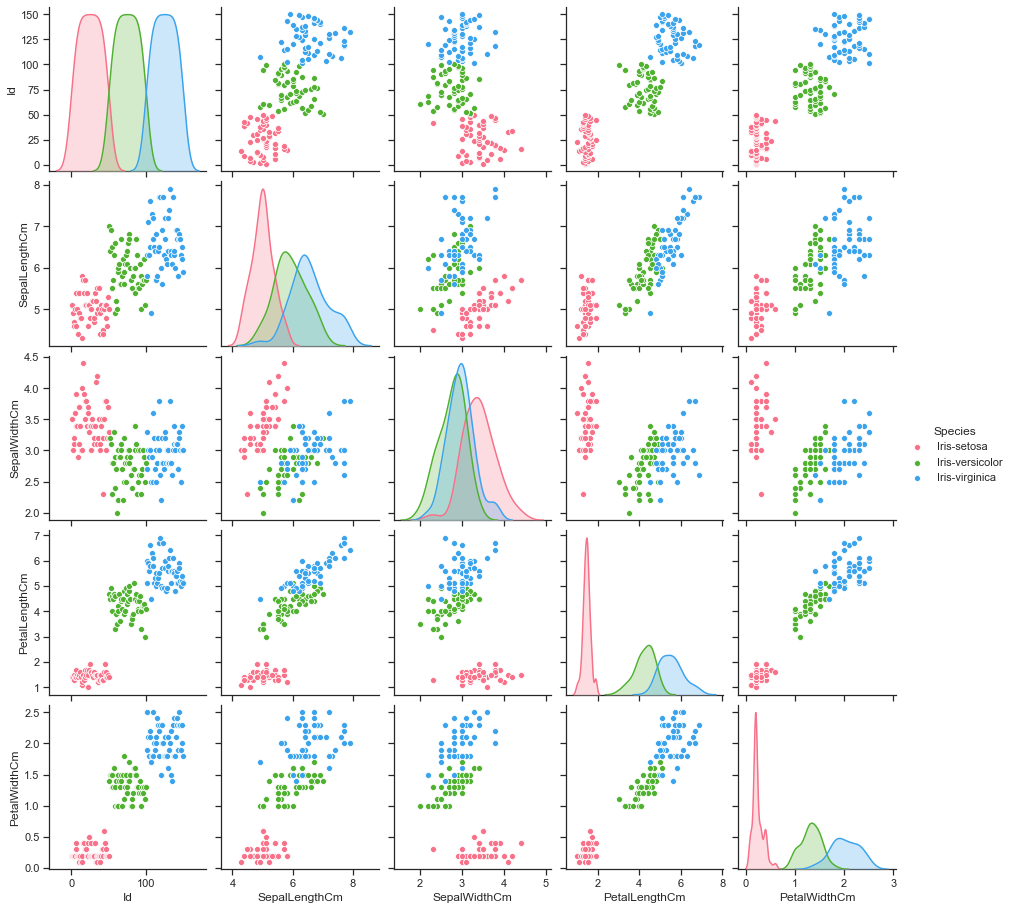

In [8]:
import seaborn as sns
#del data['Id']#인덱스 열 삭제
sns.set(style="ticks",color_codes=True)
g=sns.pairplot(data,hue="Species",palette="husl")

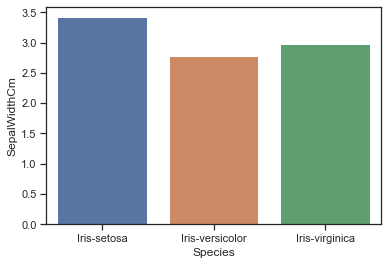

In [9]:
sns.barplot(data['Species'],data['SepalWidthCm'],ci=None)
#각 종과 특성에 대한 연관 관계

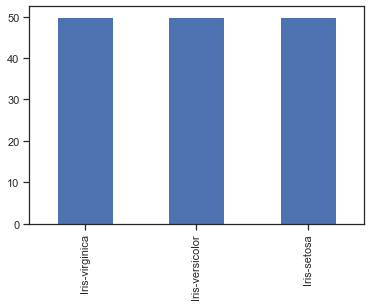

In [11]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

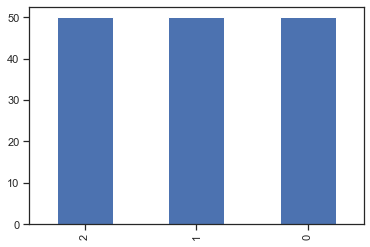

In [12]:
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [14]:
from sklearn.model_selection import train_test_split
data_X=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
data_y=data['Species'].values#예측해야 하는 값.
print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [15]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
#위는 훈련데이터와 테스트데이터를 8:2로 나눈다. 데이터 순서도 섞는다.

from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
#훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model=Sequential()
model.add(Dense(3,input_dim=4,activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
#학습률은 0.01로 한다.
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=1,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
120/120 [==============================] - 1s 8ms/step - loss: 2.0992 - accuracy: 0.1509 - val_loss: 1.9211 - val_accuracy: 0.1333
Epoch 2/200
120/120 [==============================] - 0s 813us/step - loss: 1.4639 - accuracy: 0.2513 - val_loss: 1.5893 - val_accuracy: 0.1333
Epoch 3/200
120/120 [==============================] - 0s 792us/step - loss: 1.3643 - accuracy: 0.2110 - val_loss: 1.3776 - val_accuracy: 0.1667
Epoch 4/200
120/120 [==============================] - 0s 753us/step - loss: 1.1546 - accuracy: 0.1919 - val_loss: 1.2147 - val_accuracy: 0.1333
Epoch 5/200
120/120 [==============================] - 0s 799us/step - loss: 1.1333 - accuracy: 0.2178 - val_loss: 1.1328 - val_accuracy: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 785us/step - loss: 1.0427 - accuracy: 0.2769 - val_loss: 1.0658 - val_accuracy: 0.1667
Epoch 7/200
120/120 [==============================] - 0s 768us/step - loss: 0.9546 - accuracy: 0.2881 - val_loss: 1.0198 - val_accu

120/120 [==============================] - 0s 790us/step - loss: 0.3650 - accuracy: 0.8415 - val_loss: 0.4082 - val_accuracy: 0.8000
Epoch 58/200
120/120 [==============================] - 0s 784us/step - loss: 0.4111 - accuracy: 0.8474 - val_loss: 0.4103 - val_accuracy: 0.8000
Epoch 59/200
120/120 [==============================] - 0s 778us/step - loss: 0.3513 - accuracy: 0.8686 - val_loss: 0.4173 - val_accuracy: 0.8000
Epoch 60/200
120/120 [==============================] - 0s 783us/step - loss: 0.3884 - accuracy: 0.8354 - val_loss: 0.4103 - val_accuracy: 0.8000
Epoch 61/200
120/120 [==============================] - 0s 790us/step - loss: 0.3558 - accuracy: 0.8724 - val_loss: 0.4048 - val_accuracy: 0.8000
Epoch 62/200
120/120 [==============================] - 0s 791us/step - loss: 0.3814 - accuracy: 0.8817 - val_loss: 0.4103 - val_accuracy: 0.8000
Epoch 63/200
120/120 [==============================] - 0s 779us/step - loss: 0.2987 - accuracy: 0.9240 - val_loss: 0.4005 - val_accuracy

120/120 [==============================] - 0s 788us/step - loss: 0.2410 - accuracy: 0.9384 - val_loss: 0.3103 - val_accuracy: 0.8667
Epoch 114/200
120/120 [==============================] - 0s 806us/step - loss: 0.2451 - accuracy: 0.9584 - val_loss: 0.3033 - val_accuracy: 0.8667
Epoch 115/200
120/120 [==============================] - 0s 801us/step - loss: 0.2473 - accuracy: 0.9675 - val_loss: 0.2884 - val_accuracy: 0.9333
Epoch 116/200
120/120 [==============================] - 0s 769us/step - loss: 0.2301 - accuracy: 0.9337 - val_loss: 0.2909 - val_accuracy: 0.9000
Epoch 117/200
120/120 [==============================] - 0s 740us/step - loss: 0.2597 - accuracy: 0.9276 - val_loss: 0.3037 - val_accuracy: 0.8667
Epoch 118/200
120/120 [==============================] - 0s 778us/step - loss: 0.2514 - accuracy: 0.9355 - val_loss: 0.3101 - val_accuracy: 0.8333
Epoch 119/200
120/120 [==============================] - 0s 798us/step - loss: 0.2120 - accuracy: 0.9806 - val_loss: 0.2943 - val_ac

Epoch 169/200
120/120 [==============================] - 0s 798us/step - loss: 0.1697 - accuracy: 0.9833 - val_loss: 0.2422 - val_accuracy: 0.9000
Epoch 170/200
120/120 [==============================] - 0s 751us/step - loss: 0.2059 - accuracy: 0.9780 - val_loss: 0.2330 - val_accuracy: 0.9000
Epoch 171/200
120/120 [==============================] - 0s 782us/step - loss: 0.1842 - accuracy: 0.9784 - val_loss: 0.2288 - val_accuracy: 0.9667
Epoch 172/200
120/120 [==============================] - 0s 830us/step - loss: 0.2112 - accuracy: 0.9555 - val_loss: 0.2269 - val_accuracy: 0.9667
Epoch 173/200
120/120 [==============================] - 0s 780us/step - loss: 0.2124 - accuracy: 0.9637 - val_loss: 0.2160 - val_accuracy: 0.9667
Epoch 174/200
120/120 [==============================] - 0s 770us/step - loss: 0.1474 - accuracy: 0.9817 - val_loss: 0.2217 - val_accuracy: 0.9667
Epoch 175/200
120/120 [==============================] - 0s 786us/step - loss: 0.1825 - accuracy: 0.9800 - val_loss: 0

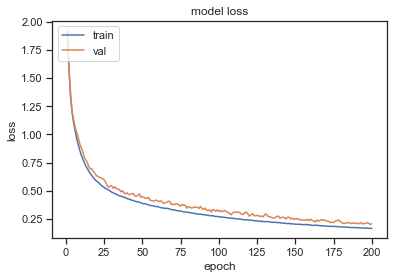

In [17]:
epochs=range(1,len(history.history['accuracy'])+1)
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [19]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 12ms/step - loss: 0.2066 - accuracy: 0.9667

 테스트 정확도: 0.9667
